# Time Series Forecasting

In [139]:
# Imports
import pandas as pd
import bamboolib
from statsmodels.tsa.arima_model import ARIMA

In [147]:
# Load data
df = pd.read_excel("Libro4.xlsx")
print(df.columns)
print(df.shape)

Index(['Valores', 'Suma de Venta Kilos', 'Suma de Venta Valor'], dtype='object')
(88, 3)


In [148]:
# Selecciona la columna
df_k = df[['Suma de Venta Kilos']]

## ARIMA Model

2879.8869501058566


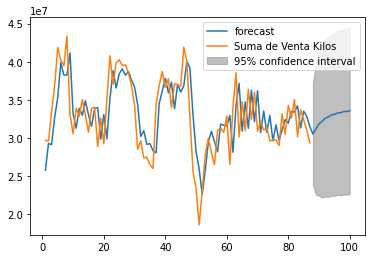

In [210]:
model_arima = ARIMA(df_k, order=(2, 1, 2))
model_arima_fit = model_arima.fit()
g = model_arima_fit.plot_predict(1, 100)
g.savefig('Forecast.png')
print(model_arima_fit.aic)
predictions = model_arima_fit.forecast(steps = 16)[0]
#predictions

In [150]:
# Realiza un dataframe para predictions y lo concatena a un dataframe final
predictions = pd.DataFrame(predictions, columns = ['Suma de Venta Kilos'])
df_final = pd.concat([df_k, predictions], ignore_index=True)

In [164]:
# Selecciona de la semana 1 a la 52 del año 2019
df_2019 = df_final[:52]
print(f'Longitud 2019: {len(df_2019)}')
sum19 = df_2019.sum(axis = 0, skipna = True)
print(f'{sum19}')
# Selecciona de la semana 1 a la 52 del año 2020
df_2020 = df_final[52:]
print(f'\nLongitud 2020: {len(df_2020)}')
sum20 = df_2020.sum(axis = 0, skipna = True)
print(f'{sum20}')
# Calcula el proncentaje con base al 2019
porcentaje = (sum20*100/sum19)
print(f'\nPorcentaje: {porcentaje}')

Longitud 2019: 52
Suma de Venta Kilos    1.766802e+09
dtype: float64

Longitud 2020: 52
Suma de Venta Kilos    1.652105e+09
dtype: float64

Porcentaje: Suma de Venta Kilos    93.508202
dtype: float64


### Make DataFrame

In [165]:
# Realiza un dataframe con la semana que le corresponde del año 2019
df_2019['Semana'] = range(1,53)
cols = df_2019.columns.tolist()
cols = cols[-1:] + cols[:-1]
df_2019 = df_2019[cols]
df_2019 = df_2019.rename(columns={'Suma de Venta Kilos': 'Venta Kilos_2019'})
# Realiza un dataframe con la semana que le corresponde del año 2019
df_2020['Semana'] = range(1,53)
cols = df_2020.columns.tolist()
cols = cols[-1:] + cols[:-1]
df_2020 = df_2020[cols]
df_2020 = df_2020.rename(columns={'Suma de Venta Kilos': 'Venta Kilos_2020'})
# Realiza un dataframe final
df_forecast = df_2019.join(df_2020.set_index('Semana'), on='Semana')

In [180]:
# Exporta a csv
df_forecast.to_csv('Forecast.csv', index=False)
forecast = pd.read_csv('Forecast.csv')
forecast

,Semana,Venta Kilos_2019,Venta Kilos_2020
0,1,25730172.0,2.301475e+07
1,2,29677208.0,2.787765e+07
2,3,29617962.0,2.997538e+07
3,4,33489036.0,2.807089e+07
4,5,36827210.0,2.649767e+07
5,6,41862980.0,3.095957e+07
6,7,40196056.0,3.131906e+07
7,8,39433856.0,3.071001e+07
8,9,43340124.0,3.289287e+07
9,10,33113044.0,2.653964e+07


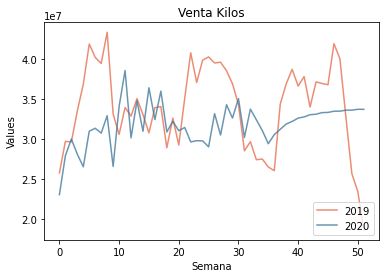

In [211]:
plt.plot(forecast['Venta Kilos_2019'], color = '#e76f51', alpha = 0.8, label = '2019');
plt.plot(forecast['Venta Kilos_2020'], color = '#457b9d', alpha = 0.8, label = '2020');
plt.title('Venta Kilos');
plt.xlabel('Semana');
plt.ylabel('Values');
plt.legend(loc = 'lower right');
plt.savefig('Ventas_Kilos.png')